# Matriz de gráficos, Pequeños múltiples y Ridge

## Importar librerías requeridas

Primero es necesario importar los módulos necesarios para crear este tipo de visualización.
En este caso necesitamos tres módulos.

In [25]:
# Importar el módulo seaborn abreviado a sns
import seaborn as sns

# Importar el módulo pyploy de matplotlib abreviado a plt
import matplotlib.pyplot as plt

# Importar el módulo pandas abreviado a pd
import pandas as pd

import plotly.graph_objects as go
from plotly.colors import n_colors
import numpy as np

### Cargar *datasets*

In [2]:
# Utilizar la función read_csv para cargar datos tabulares desde CSV
dataset_comidas = pd.read_csv("tips.csv")
dataset_iris = pd.read_csv("iris.csv")

## Matriz de gráficos de dispersión para combinaciones de valores

Para crear una matriz de gráficos de dispersión básico, hay varias alternativas. Para crear su versión más simple que separa un *dataset* en distintos grupos dependiendo de valores de sus atributos, se puede hacer uso de la clase `FacetGrid`.

`FacetGrid` permite crear una matriz de visualizaciones a partir de un *dataset* y aplicar una función de visualización, como `scatter`, en cada celda:

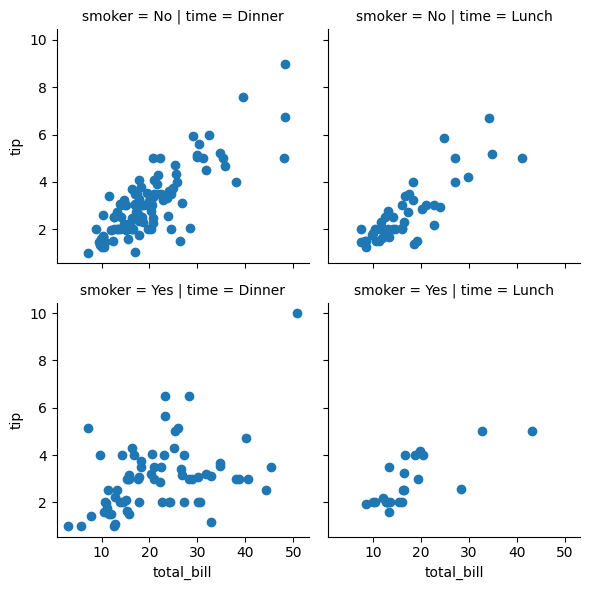

In [5]:
# Con FacetGrid se crea la matriz y específica sus dimensiones a partir del dataset
# Se le entrega el dataset y específica que:
# - en las columnas iran los valores del atributo time
# - en las filas iras los valores del atributo smoker
g = sns.FacetGrid(dataset_comidas, col="time",  row="smoker")

# Mediante el método map se le especifica a la matriz que función de visualización utilizar
# Se le entrega plt.scatter para gráfico de dispersión,
# y se específica los atributos de los ejes: total_bill y tip
g = g.map(plt.scatter, "total_bill", "tip")

## Matriz de gráficos de dispersión para combinaciones de atributos

Por otro lado, para crear una matriz de gráficos de dispersión para ver las relaciones entre distintas combinaciones de atributos numéricos, existe `pairplot`.

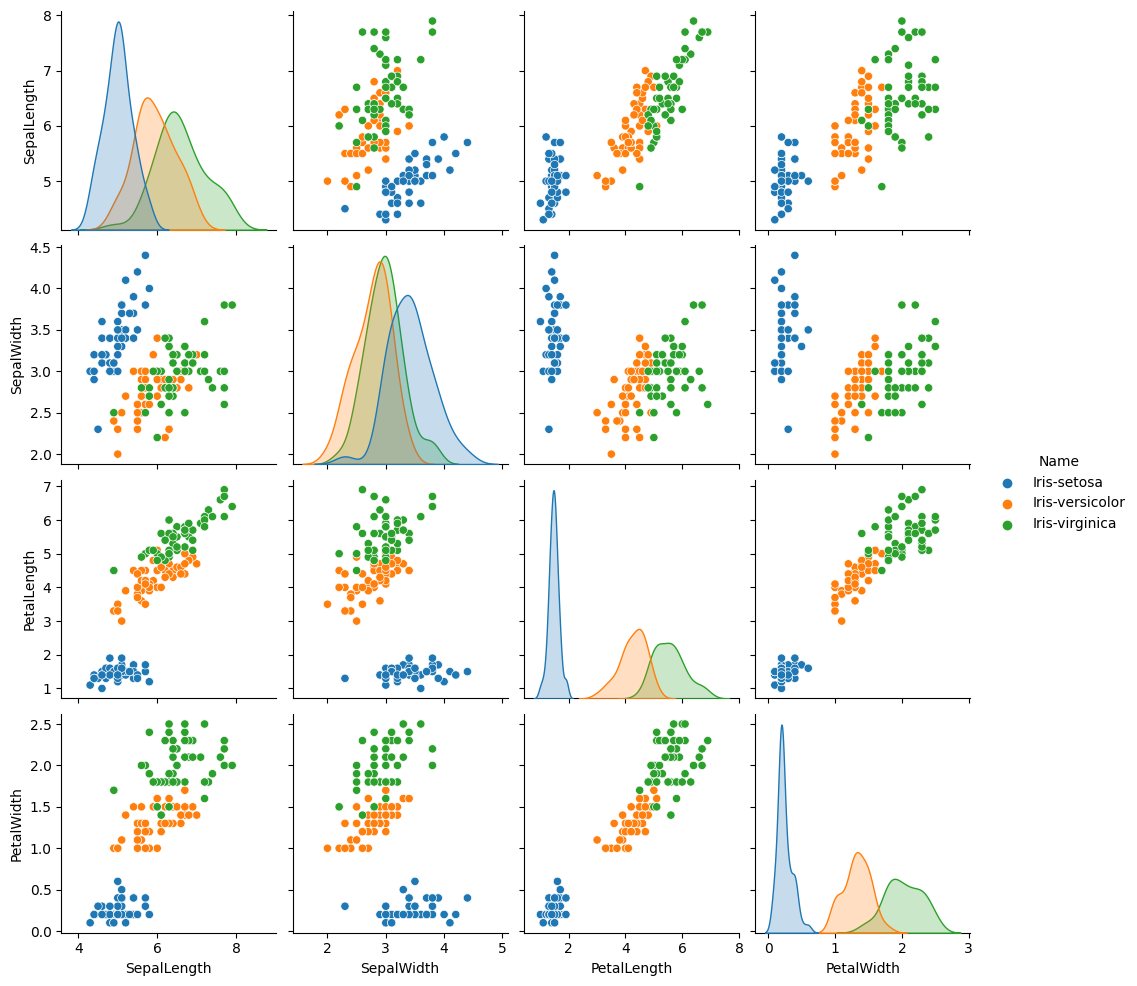

In [10]:
# Utilizar directamente la función pairplot que recibe un dataset como primer argumento
sns.pairplot(dataset_iris, hue="Name")

`pairplot` permite mucha personalización y uso de canales.

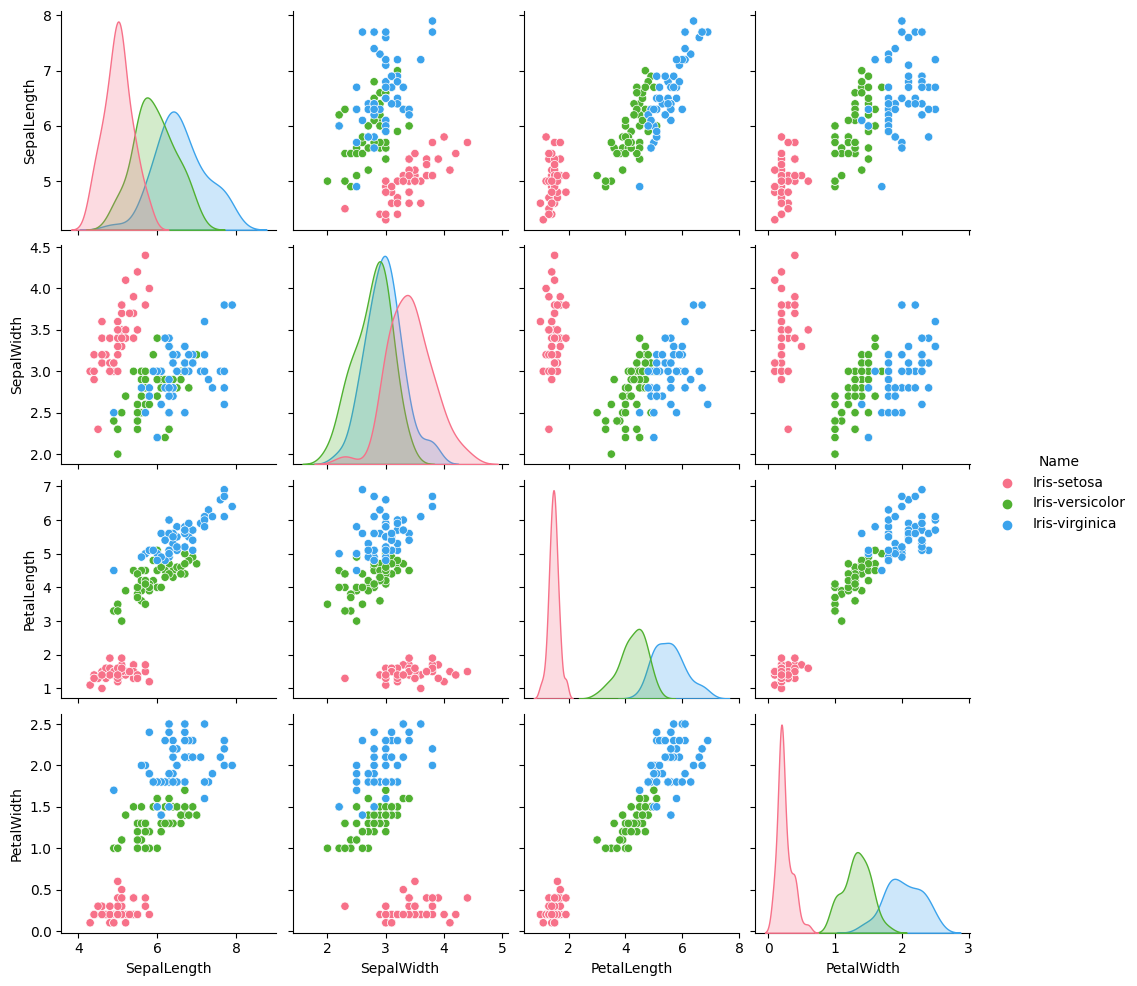

In [8]:
# El parámetro hue permite especificar el atributo que colorea los datos, y pallete la paleta de colores usar
sns.pairplot(dataset_iris, hue="Name", palette="husl")

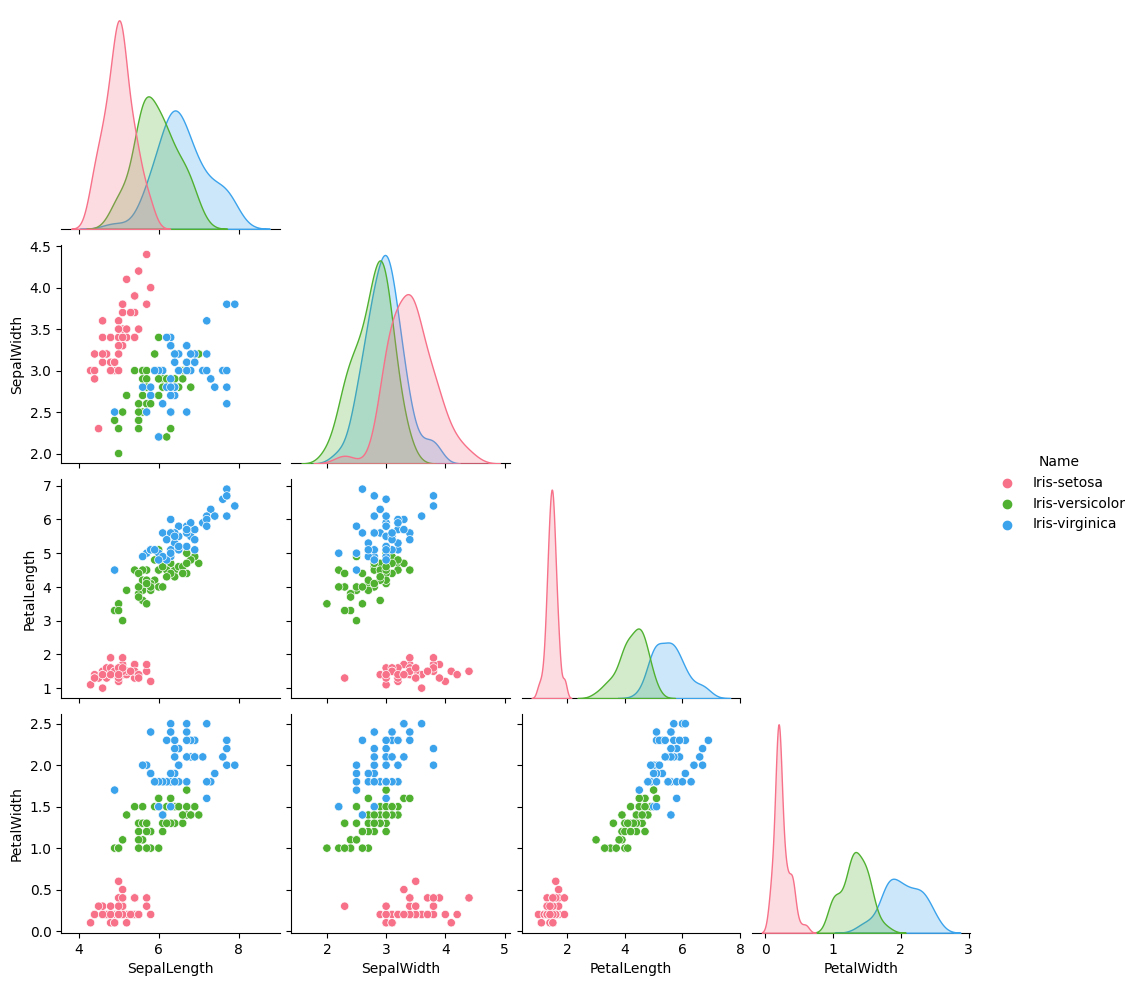

In [11]:
# Como la matriz generalmente es simetrica, podemos ahorrarnos una mitad con el parámetro corner
sns.pairplot(dataset_iris, hue="Name", palette="husl", corner=True)

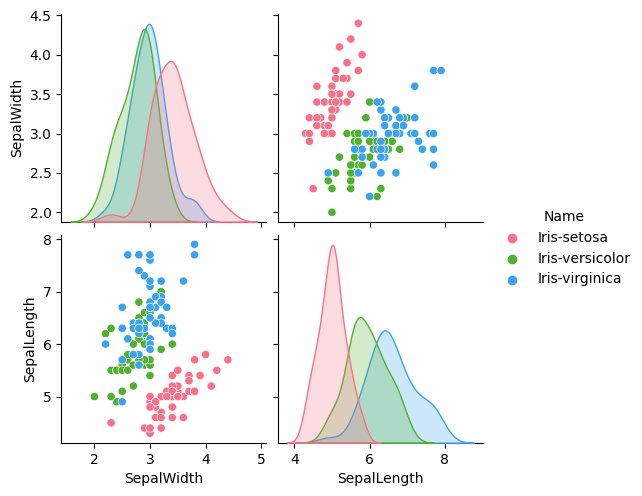

In [46]:
# Para seleccionar los atributos que se quieren mostrar, existe el parámetro vars
sns.pairplot(dataset_iris, hue="Name", palette="husl",
             vars=["SepalWidth", "SepalLength"])

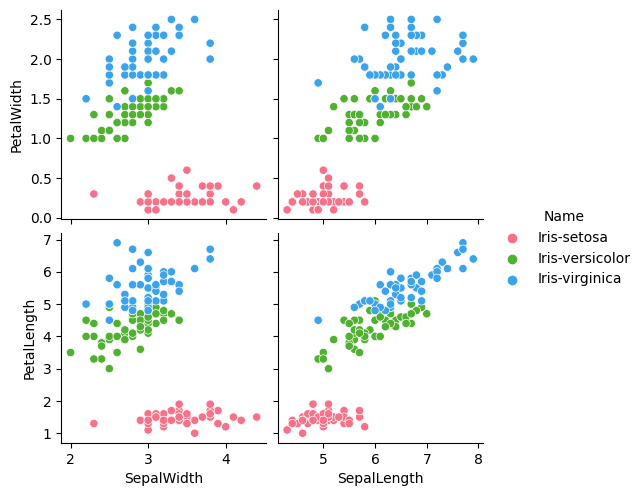

In [14]:
# Para ir más allá y seleccionar los atributos específicos de filas y columnas, están x_vars y y_vars
sns.pairplot(dataset_iris, hue="Name", palette="husl",
                 x_vars=["SepalWidth", "SepalLength"],
                 y_vars=["PetalWidth", "PetalLength"])

Para más detalles, puedes consultar las documentaciones de todas estas funciones:
- [`FacetGrid`](https://seaborn.pydata.org/generated/seaborn.FacetGrid.html#seaborn.FacetGrid)
- [`pairplot`](https://seaborn.pydata.org/generated/seaborn.pairplot.html#seaborn.pairplot)

## Pequeños múltiples

In [23]:
# Utilizar la función read_csv para cargar el archivo
df = pd.read_csv("calories.csv")
df.head()

,day,calories,student
0,1,1403,a
1,2,1433,a
2,3,1375,a
3,4,1385,a
4,5,1436,a


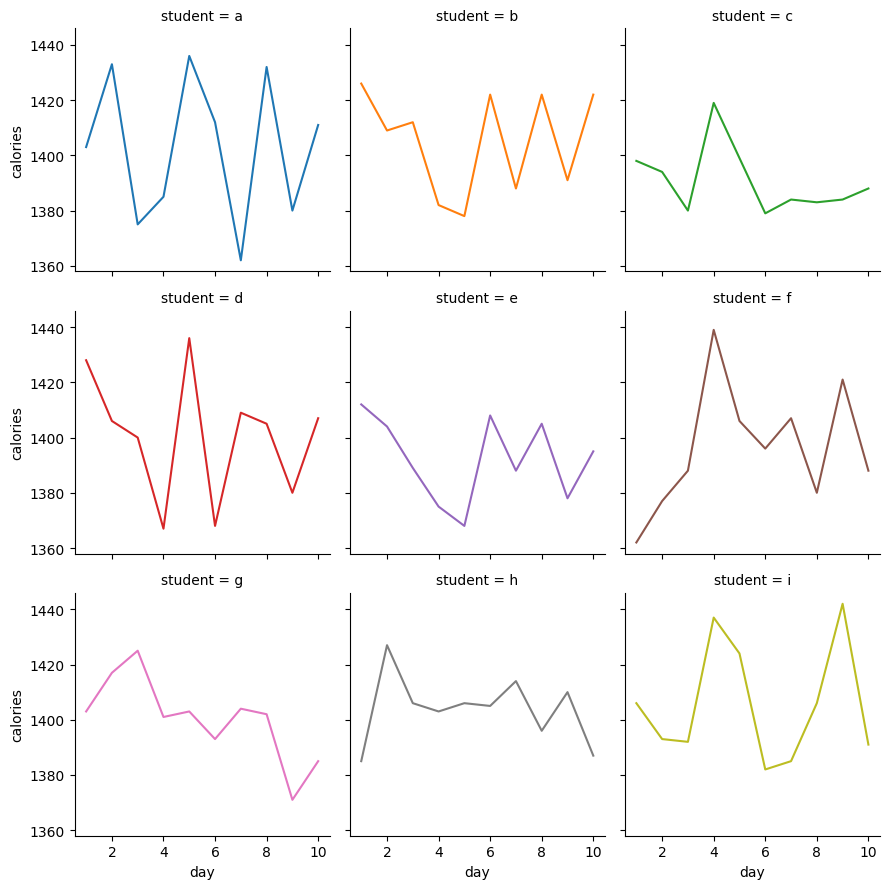

In [21]:
# Generar una grilla en donde los argumentos son:
# data=df: indicar de donde provienen los datos
# col="student": indicar qué columna utilizar para definir cuantos gráficos hay
# hue="student": indicar qué columna utilizar para definir los colores de cada gráfico
# col_wrap=3: indicar cuantas columnas pueden haber.
# Esta función solo genera los gráficos sin datos, ahora falta indicar con qué llenar cada gráfico
grid = sns.FacetGrid(data=df, col="student", hue="student", col_wrap=3)

# Llamamos al método map que se encarga de llenar cada gráfico de la grilla. Sus argumentos son:
# * plt.plot: indicar la forma con la que se llenará cada gráfico.  
#             Para este curso, puede ser plt.plot para gráfico de línea o plt.scatter para gráfico de punto
# * "day": indicar qué columna utilizar como coordenada en el eje X.
# * "calories": indicar qué columna utilizar como coordenada en el eje Y.
# * marker="": indicar cómo se va a marcar cada punto del gráfico. En este caso, no se marcará.
# Visitar https://matplotlib.org/3.1.3/api/markers_api.html para ver más marcadores posibles
grid.map(plt.plot, "day", "calories", marker="")

# Visualizar el gráfico
plt.show()

## Ridge

In [45]:
data = (np.linspace(1, 2, 12)[:, np.newaxis] * np.random.randn(12, 200) +
            (np.arange(12) + 2 * np.random.random(12))[:, np.newaxis])

colors = n_colors('rgb(5, 200, 200)', 'rgb(200, 10, 10)', 12, colortype='rgb')

# 12 filas con 200 columnas
print(data.shape)

pd.DataFrame(data).head()

(12, 200)


,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,2.339683,2.136678,1.041262,0.687026,0.942718,0.896993,1.026344,1.518661,0.318772,1.786519,...,1.461840,0.337975,-0.125325,-0.355331,2.570254,2.114105,1.485057,0.427292,2.491556,1.444798
1,3.245595,1.347919,3.475941,2.691219,1.390574,4.269107,3.560662,2.451954,1.876658,5.562136,...,3.934775,3.186084,2.642654,2.543102,4.855321,3.105419,2.567968,4.432462,4.712987,3.203302
2,4.160811,3.971744,2.350313,3.601638,6.465340,4.025892,3.182836,4.061477,2.623015,4.959877,...,3.947294,3.205225,3.788672,3.941001,4.630703,4.038916,4.602106,4.142549,5.266350,5.499762
3,4.931835,4.886015,4.647648,3.352776,3.837196,6.153486,4.060462,3.808070,4.653906,5.425474,...,4.645823,5.317165,4.879265,3.121078,3.772257,4.006485,3.951973,5.540638,6.782107,4.326461
4,2.518388,4.759919,3.513736,3.930850,6.365782,3.558702,8.573054,4.146792,4.390579,4.160013,...,6.886800,4.544479,7.511546,4.001492,4.668545,3.952899,3.592220,6.371727,4.266381,2.583607


In [52]:
fig = go.Figure()
for data_line, color in zip(data, colors):
    fig.add_trace(go.Violin(x=data_line, line_color=color))

# Width controla el tamaño de los graficos individuales
# En points podemos usar varios valores distintos
# "all" muestra todos los puntos 
# "outliers" muestra los outliers
# False no muestra puntos
fig.update_traces(orientation='h', side='positive', width=4, points=False)
# Seteamos xaxis_showgrid y xaxis_zeroline a False para evitar postrar lineas verticales
fig.update_layout(xaxis_showgrid=True, xaxis_zeroline=True)
fig.show()